# Feature Scaling 
## Standardization 
## Normalization 

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
394,15757632,Female,39,59000,0
399,15594041,Female,49,36000,1
214,15622478,Male,47,43000,0
291,15596522,Male,49,89000,1


In [6]:
df.drop(['User ID', 'Gender'] , axis =1 , inplace = True )

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0


In [7]:
df.shape

(400, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


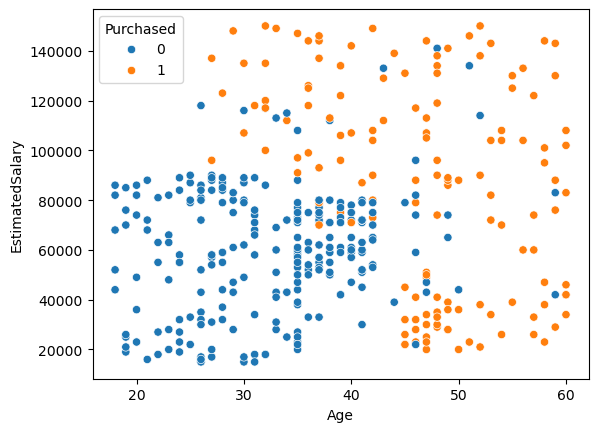

In [13]:
sns.scatterplot(data = df , x='Age' , y='EstimatedSalary' , hue='Purchased')
plt.show()

# train test and split 

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train , y_test= train_test_split((df.drop('Purchased' , axis =1 )) , df['Purchased'] ,test_size = 0.2 , random_state =0 )

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [30]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [27]:
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

In [36]:
x_train_scaled = pd.DataFrame(xs_train ,columns = x_train.columns)
x_test_scaled = pd.DataFrame(xs_test ,columns = x_test.columns)

In [40]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


Text(0.5, 1.0, 'Data after scaling')

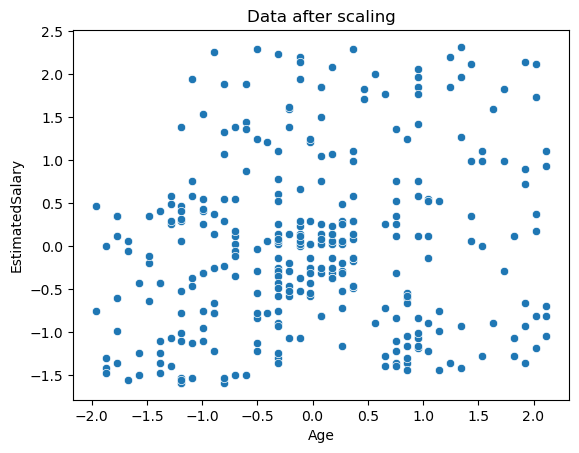

In [42]:
sns.scatterplot(data =x_train_scaled , x= 'Age' ,  y='EstimatedSalary')
plt.title('Data after scaling')

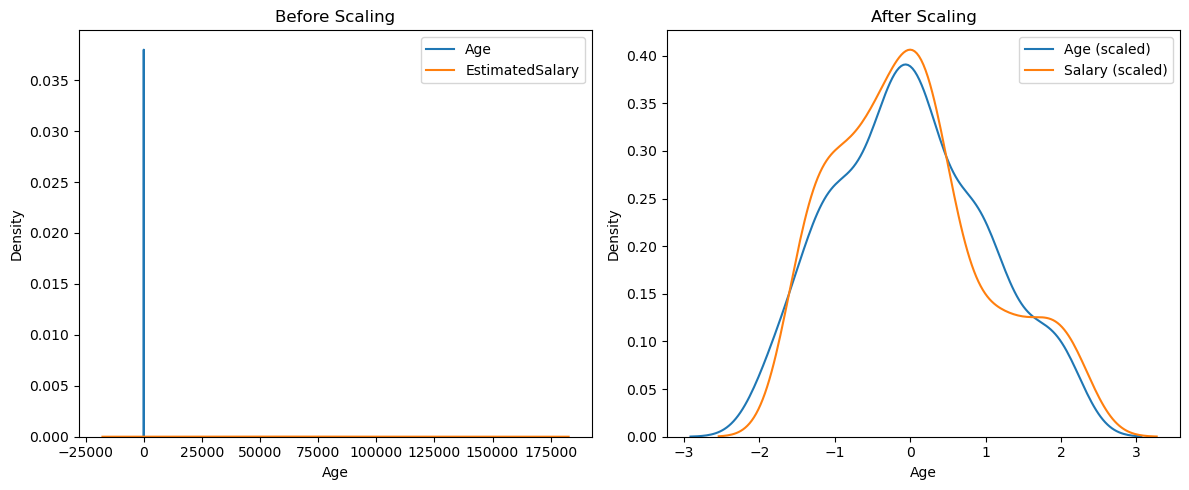

In [48]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=x_train , x ='Age', ax=axes[0], label='Age')
sns.kdeplot(data=x_train  , x='EstimatedSalary', ax= axes[0] ,label = 'EstimatedSalary' )
axes[0].set_title("Before Scaling")
axes[0].legend()

# Plot scaled features
sns.kdeplot(data=x_train_scaled, x='Age', ax=axes[1], label='Age (scaled)')
sns.kdeplot(data=x_train_scaled, x='EstimatedSalary', ax=axes[1], label='Salary (scaled)')
axes[1].set_title("After Scaling")
axes[1].legend()

plt.tight_layout()
plt.show()


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr_scale = LogisticRegression()

In [53]:
lr.fit(x_train , y_train)
lr_scale.fit(x_train_scaled , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
y_pred=lr.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [62]:
y_pre_sc = lr_scale.predict(x_test_scaled)
print(y_pre_sc)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test , y_pred)

0.9125

In [63]:
accuracy_score(y_test , y_pre_sc)

0.925

# Decision Tree 

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt_sc = DecisionTreeClassifier()

In [68]:
dt.fit(x_train , y_train)
dt_sc.fit(x_train_scaled , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
t_pred = dt.predict(x_test)
tc_pred = dt_sc.predict(x_test_scaled)

In [72]:
accuracy_score(t_pred, y_test)

0.9

In [73]:
accuracy_score(tc_pred, y_test)

0.9125